In [9]:
import pyrealsense2 as rs
import numpy as np

In [10]:
pipeline = rs.pipeline()


In [11]:
config = rs.config()
config.enable_stream(rs.stream.color, 0, 0, rs.format.rgb8, 30)
pipeline.start(config)

In [12]:
profile = pipeline.get_active_profile()
intrinsics = profile.get_stream(rs.stream.color).as_video_stream_profile().get_intrinsics()

In [13]:
fx = intrinsics.fx  # Focal length in x-direction
fy = intrinsics.fy  # Focal length in y-direction
cx = intrinsics.ppx  # Principal point x-coordinate
cy = intrinsics.ppy  # Principal point y-coordinate

In [14]:
pipeline.stop()

In [15]:
print("fx: ", fx)
print("fy: ", fy)
print("cx: ", cx)
print("cy: ", cy)

fx:  912.3776245117188
fy:  911.2467651367188
cx:  637.6239013671875
cy:  359.3946533203125


In [47]:
# get transformation matrix for depth map to xyz coordinates

transformation_matrix = np.array(
    [
        [fx, 0, cx],
        [0, fy, cy],
        [0, 0, 1],
    ]
)


In [75]:
# load depth map 
sample = "Duran_250mL_80ml_1105_2559"
depth_map_vessel = np.load("../data/processed/" + sample + "/Input_EmptyVessel_Depth_segmented.npy")
depth_map = np.load("../data/processed/" + sample + "/Input_EmptyVessel_Depth_segmented.npy")
depth_map = np.load("../data/processed/" + sample + "/Input_ContentDepth_segmented.npy")
img = np.load("../data/processed/" + sample + "/Input_RGBImage.npy")

# convert depth map from log to linear space
depth_map = np.exp(depth_map)

#volume_estimation\data\processed\Duran_250mL_80ml_1105_2559
#volume_estimation\data\processed\Duran_500mL_532ml_0905_3545
#volume_estimation\data\processed\Cell_Flask_160mL_47ml_2404_5140

In [63]:
import numpy as np
from scipy.spatial.transform import Rotation as R

def depth_map_conversion(depth_map, camera_intrinsics):
    # Get the intrinsic parameters
    fx = camera_intrinsics[0][0]
    fy = camera_intrinsics[1][1]
    cx = camera_intrinsics[0][2]
    cy = camera_intrinsics[1][2]
    print(fx, fy, cx, cy)

    # Create the meshgrid
    rows, cols = depth_map.shape[:2]
    print(rows, cols)
    c, r = np.meshgrid(np.arange(cols), np.arange(rows), sparse=True)

    # Calculate the 3D coordinates
    x = (c - cx) * depth_map / fx
    print(x.shape)
    # value count in x  
    unique, counts = np.unique(x, return_counts=True)
    print(dict(zip(unique, counts)))
    y = (r - cy) * depth_map / fy
    z = depth_map

    # Stack the coordinates and return them
    return x,y,z



In [116]:
x,y,z = depth_map_conversion(depth_map, transformation_matrix)

912.3776245117188 911.2467651367188 637.6239013671875 359.3946533203125
480 640
(480, 640)
{-1.0037868807361927: 2, -1.0030063310622144: 2, -1.002590760998087: 3, -1.001812352022157: 1, -1.0014452317142577: 1, -1.0006646820402791: 3, -1.0002782954499463: 1, -1.0002555340702965: 2, -0.9998841323663009: 1, -0.9994956050779198: 1, -0.9991035826923225: 1, -0.9986987161184361: 2, -0.9982272697064635: 2, -0.9979302243338666: 1, -0.9979203071425059: 2, -0.9975424833443657: 2, -0.9974381572402924: 1, -0.9974070512670424: 1, -0.9971475339618401: 2, -0.9967619336703873: 4, -0.9967284688004966: 2, -0.9966350643852567: 1, -0.9963648435898135: 2, -0.9963634891906455: 2, -0.9963062584436323: 4, -0.9961809617562621: 2, -0.995981383996409: 1, -0.9958599323079501: 1, -0.995582153217787: 6, -0.9955192866755093: 5, -0.9952008343224306: 2, -0.9951759322447327: 4, -0.9951657968547793: 8, -0.9948066712387852: 4, -0.9947994628457604: 3, -0.9947323149073863: 4, -0.9944202846484522: 3, -0.9943809657847047: 5, 

In [117]:
print(x.mean(), y.mean(), z.mean())

-0.3892643681698037 -0.14704147738862075 1.121


In [118]:
print(x.shape, y.shape, z.shape)

(480, 640) (480, 640) (480, 640)


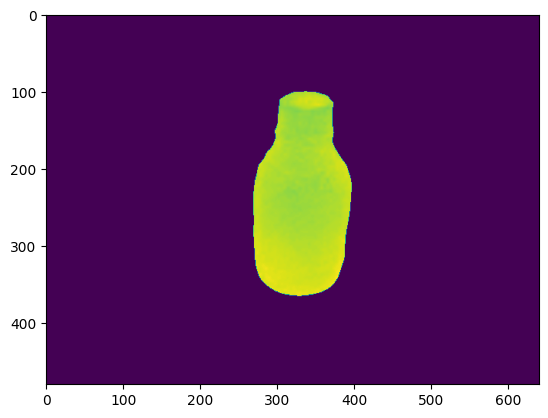

In [119]:
# visualize z map
import matplotlib.pyplot as plt
plt.imshow(z)
plt.show()

In [120]:
#value count in x layer
unique, counts = np.unique(x, return_counts=True)
print(dict(zip(unique, counts)))


{-1.0037868807361927: 2, -1.0030063310622144: 2, -1.002590760998087: 3, -1.001812352022157: 1, -1.0014452317142577: 1, -1.0006646820402791: 3, -1.0002782954499463: 1, -1.0002555340702965: 2, -0.9998841323663009: 1, -0.9994956050779198: 1, -0.9991035826923225: 1, -0.9986987161184361: 2, -0.9982272697064635: 2, -0.9979302243338666: 1, -0.9979203071425059: 2, -0.9975424833443657: 2, -0.9974381572402924: 1, -0.9974070512670424: 1, -0.9971475339618401: 2, -0.9967619336703873: 4, -0.9967284688004966: 2, -0.9966350643852567: 1, -0.9963648435898135: 2, -0.9963634891906455: 2, -0.9963062584436323: 4, -0.9961809617562621: 2, -0.995981383996409: 1, -0.9958599323079501: 1, -0.995582153217787: 6, -0.9955192866755093: 5, -0.9952008343224306: 2, -0.9951759322447327: 4, -0.9951657968547793: 8, -0.9948066712387852: 4, -0.9947994628457604: 3, -0.9947323149073863: 4, -0.9944202846484522: 3, -0.9943809657847047: 5, -0.994028262262855: 3, -0.9940167724737338: 6, -0.9939453431392634: 2, -0.9936397349744739:

NameError: name 'x' is not defined

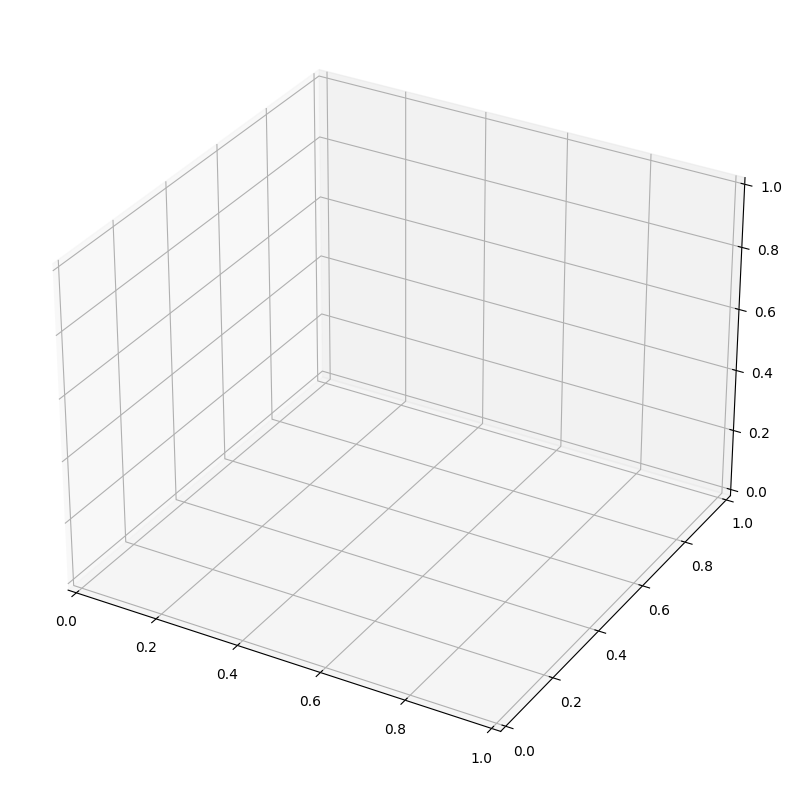

In [45]:
# visualize x, y, z layers
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, s=0.1)
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")
plt.show()


In [46]:
# convert x y z to xyz map
xyz_map = np.stack((x,y,z), axis=0)

# set all values in xyz map to 0 where z is 0
xyz_map[0][z == 0] = 0
xyz_map[1][z == 0] = 0


NameError: name 'x' is not defined

In [123]:
# visualize x, y, z layers with open3d
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt


xyz_map = xyz_map

xyz_map = xyz_map.reshape(3, -1).T
print(xyz_map.shape)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz_map)
o3d.visualization.draw_geometries([pcd])



(307200, 3)


In [56]:
def Depth2XYZ(Img,DepthMap,transformation_matrix):
    #M = K.intrinsic_matrix
    M = transformation_matrix
    height = DepthMap.shape[0]
    width = DepthMap.shape[1]
    GridY = np.array(list(range(height))) - height/2
    GridY = np.transpose(np.tile(GridY, (width, 1)))
    GridX = np.array(list(range(width))) - width/2#(list(range(width)) - width/2)  # Might be +shift x https://www.rojtberg.net/1601/from-blender-to-opencv-camera-and-back/
    GridX = np.tile(GridX, (height, 1))
    XYZ = np.zeros([height, width, 3], dtype=np.float32)
    XYZ[:, :, 2] = DepthMap
    XYZ[:, :, 1] = DepthMap * GridY / M[0,0]
    XYZ[:, :, 0] = DepthMap * GridX / M[1,1]
    ROI = (DepthMap > 1).astype(np.float32)
    return XYZ,ROI,Img,DepthMap

In [76]:
xyzMap, ROI, RGB, depth = Depth2XYZ(img, depth_map, transformation_matrix)

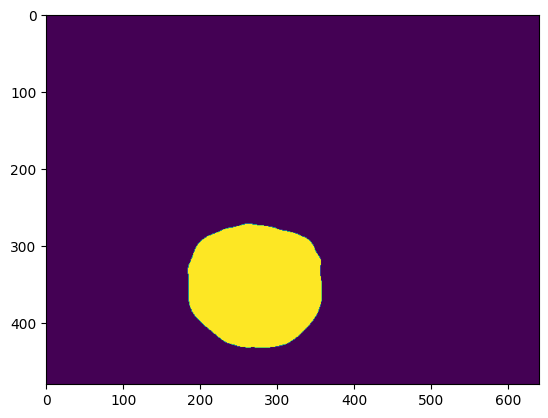

In [77]:
# visualize ROI
import matplotlib.pyplot as plt
plt.imshow(ROI)
plt.show()

In [59]:
# count 0 in depth map
unique, counts = np.unique(depth, return_counts=True)
print(dict(zip(unique, counts)))

{1.0: 298539, 23.77: 4, 23.86: 7, 23.9: 3, 23.95: 14, 24.0: 10, 24.05: 25, 24.1: 26, 24.14: 63, 24.19: 77, 24.23: 97, 24.28: 120, 24.33: 160, 24.38: 234, 24.42: 304, 24.47: 289, 24.52: 313, 24.56: 361, 24.61: 352, 24.66: 415, 24.7: 417, 24.75: 437, 24.8: 460, 24.84: 460, 24.9: 473, 24.95: 453, 25.0: 447, 25.05: 363, 25.1: 345, 25.14: 264, 25.19: 233, 25.23: 213, 25.3: 170, 25.34: 149, 25.39: 119, 25.44: 102, 25.48: 107, 25.55: 70, 25.6: 96, 25.64: 88, 25.69: 41, 25.73: 26, 25.8: 27, 25.84: 10, 25.89: 29, 25.94: 31, 26.0: 27, 26.05: 22, 26.1: 19, 26.14: 10, 26.2: 15, 26.25: 15, 26.3: 14, 26.34: 11, 26.4: 4, 26.45: 7, 26.5: 4, 26.56: 2, 26.61: 3, 26.66: 2, 26.72: 2}


In [52]:
# visualize x, y, z layers with open3d
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt


xyz_map = XYZ[0]

xyz_map = xyz_map.reshape(3, -1).T
print(xyz_map.shape)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz_map)
o3d.visualization.draw_geometries([pcd])


NameError: name 'XYZ' is not defined

In [60]:
def DisplayPointCloud(xyzMap,RGB,ROI,step=1):
    # -----------------------------3d point cloud----------------------------------------------------------
    NumPoints=int(xyzMap.shape[0]*xyzMap.shape[1]/step**2)
    xyz = np.zeros([NumPoints, 3], np.float32)
    colors = np.zeros([NumPoints, 3], np.float32)
    tt=0
    for x in range(0,xyzMap.shape[1],step):
        for y in range(0,  xyzMap.shape[0],step):
            if (ROI[y, x]) > 0 and  tt<NumPoints:
                xyz[tt]  = xyzMap[y, x]
                colors[tt] = RGB[y, x]/255
                tt+=1
               # print(tt)
    xyz = xyz[:tt,:]
    colors = colors[:tt, :]
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(xyz)
    pcd.colors = o3d.utility.Vector3dVector(colors)
    o3d.visualization.draw_geometries([pcd])

In [78]:
DisplayPointCloud(xyzMap, RGB, ROI, step=1)

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 


In [32]:
import cv2
import numpy as np

def rectify_image(source_image, source_intrinsics, target_intrinsics, transformation_matrix):
    # Load the source image
    img = cv2.imread(source_image)

    # Retrieve the source image's camera intrinsics
    fx, fy = source_intrinsics['fx'], source_intrinsics['fy']
    cx, cy = source_intrinsics['cx'], source_intrinsics['cy']
    #distortion_coeffs = source_intrinsics['distortion_coeffs']

    # Compute the transformed camera intrinsics
    transformed_fx = transformation_matrix[0, 0] * fx + transformation_matrix[0, 2] * cx
    transformed_fy = transformation_matrix[1, 1] * fy + transformation_matrix[1, 2] * cy
    transformed_cx = transformation_matrix[0, 2] * fx + transformation_matrix[0, 2] * cx
    transformed_cy = transformation_matrix[1, 2] * fy + transformation_matrix[1, 2] * cy

    transformed_intrinsics = {
        'fx': transformed_fx,
        'fy': transformed_fy,
        'cx': transformed_cx,
        'cy': transformed_cy,
        #'distortion_coeffs': distortion_coeffs
    }

    print("Transformed camera intrinsics: ", transformed_intrinsics)

    # Rectify the source image
    mapx, mapy = cv2.initUndistortRectifyMap(
        cameraMatrix=np.array([[fx, 0, cx], [0, fy, cy], [0, 0, 1]]),
        distCoeffs=None,
        R=transformation_matrix[:, :3],
        newCameraMatrix=np.array([[transformed_fx, 0, transformed_cx], [0, transformed_fy, transformed_cy], [0, 0, 1]]),
        size=(img.shape[1], img.shape[0]),
        m1type=cv2.CV_32FC1
    )

    rectified_img = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)

    return rectified_img, transformed_intrinsics


# Example usage

# Source image path
source_image = "../data/processed/" + sample + "/Input_RGBImage.png"

# Source image camera intrinsics
source_intrinsics = {
    'fx': 500.0,
    'fy': 500.0,
    'cx': 320.0,
    'cy': 240.0,
    #'distortion_coeffs': [1.0, 0.0, 0.0, 0.0, 0.0]
}

# Target image camera intrinsics
target_intrinsics = {
    'fx': 500.0,
    'fy': 500.0,
    'cx': 320.0,
    'cy': 240.0,
    #'distortion_coeffs': [1.0, 0.0, 0.0, 0.0, 0.0]
}

# Transformation matrix representing the mapping between source and target intrinsics
transformation_matrix = np.array([[target_intrinsics['fx']/source_intrinsics['fx'], 0, 0],
                                 [0, target_intrinsics['fy']/source_intrinsics['fy'], 0],
                                 [0, 0, 1]])

# Rectify the image using camera intrinsics
rectified_image, rectified_intrinsics = rectify_image(source_image, source_intrinsics, target_intrinsics, transformation_matrix)

# print rectified camera intrinsics
print("Rectified camera intrinsics: ", rectified_intrinsics)

# print shape of rectified image
print("Rectified image shape: ", rectified_image.shape)
# save rectified image
cv2.imwrite("../output/Input_RGBImage_rectified.png", rectified_image)

# Display the rectified image
cv2.imshow('Rectified Image', rectified_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



Transformed camera intrinsics:  {'fx': 820.0, 'fy': 740.0, 'cx': 820.0, 'cy': 740.0}
Rectified camera intrinsics:  {'fx': 820.0, 'fy': 740.0, 'cx': 820.0, 'cy': 740.0}
Rectified image shape:  (480, 640, 3)


In [ ]:
fx:  912.3776245117188
fy:  911.2467651367188
cx:  637.6239013671875
cy:  359.3946533203125

In [36]:
import cv2
import numpy as np

def align_intrinsics(input_image, input_intrinsics, desired_intrinsics):
    # Load the input image
    image = cv2.imread(input_image)

    # Extract the input intrinsics
    fx, fy = input_intrinsics['fx'], input_intrinsics['fy']
    cx, cy = input_intrinsics['cx'], input_intrinsics['cy']

    # Extract the desired intrinsics
    desired_fx, desired_fy = desired_intrinsics['fx'], desired_intrinsics['fy']
    desired_cx, desired_cy = desired_intrinsics['cx'], desired_intrinsics['cy']

    # Compute the scale factors
    scale_x = desired_fx / fx
    scale_y = desired_fy / fy

    # Compute the translation offsets
    tx = (desired_cx - cx) * scale_x
    ty = (desired_cy - cy) * scale_y

    # Generate the transformation matrix
    transformation_matrix = np.array([[scale_x, 0, tx],
                                      [0, scale_y, ty],
                                      [0, 0, 1]])

    # Apply the transformation to the image
    aligned_image = cv2.warpPerspective(image, transformation_matrix, (image.shape[1], image.shape[0]))

    return aligned_image

# Example usage
input_image_path = "../data/processed/" + sample + "/Input_RGBImage.png"
input_intrinsics = {'fx': 912.37, 'fy': 911, 'cx': 637, 'cy': 359}
desired_intrinsics = {'fx': 914, 'fy': 1000, 'cx': 640, 'cy': 361}

aligned_image = align_intrinsics(input_image_path, input_intrinsics, desired_intrinsics)

# Display the aligned image
cv2.imshow('Aligned Image', aligned_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
